<a href="https://colab.research.google.com/github/ADITYASHAH-IITP/Self-organizing-map/blob/main/Hybrid_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=8c3448953cef99b578d93def096ea06596d2c88bf5e6dd040a185206cbb067d1
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [6]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [8]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


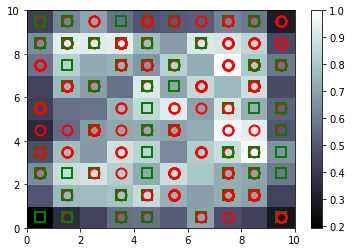

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [11]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,7)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [12]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15719940
15761158
15711742
15761733
15770995
15736399
15766734
15667934
15665087
15753591
15797246
15715519
15630592
15757306
15711759


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [13]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [15]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [17]:
import tensorflow as tf
tf.__version__

'2.5.0'

## Initializing the ANN

In [18]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [22]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 0.5663 - accuracy: 0.8855
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.3017 - accuracy: 0.9783
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1677 - accuracy: 0.9783
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1174 - accuracy: 0.9783
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1002 - accuracy: 0.9783
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0920 - accuracy: 0.9783
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0862 - accuracy: 0.9783
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0825 - accuracy: 0.9783
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0791 - accuracy: 0.9783
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0767 - accuracy: 0.9783

## Predicting test set results

In [23]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [24]:
print(y_pred)

[[1.56214230e+07 2.01608764e-05]
 [1.56548590e+07 1.77294016e-04]
 [1.57997850e+07 1.80006027e-04]
 ...
 [1.56045360e+07 1.58669651e-01]
 [1.57199400e+07 1.98382109e-01]
 [1.57363990e+07 1.98382109e-01]]
